<a href="https://colab.research.google.com/github/joseemaro/bdm_datasets/blob/main/final_bdm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

se importan las librerias y los archivos necesarios para el analisis

In [39]:
!wget https://raw.githubusercontent.com/joseemaro/bdm_datasets/main/googleplaystore.csv

!wget https://raw.githubusercontent.com/joseemaro/bdm_datasets/main/googleplaystore_user_reviews.csv

import numpy as np # algebra linear
import pandas as pd # procesamiento de datos, CSV file 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches
%matplotlib inline
plt.style.use('seaborn-white')

--2021-02-20 18:29:52--  https://raw.githubusercontent.com/joseemaro/bdm_datasets/main/googleplaystore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1360155 (1.3M) [text/plain]
Saving to: ‘googleplaystore.csv.4’

googleplaystore.csv 100%[===================>]   1.30M  --.-KB/s    in 0.05s   

2021-02-20 18:29:53 (26.4 MB/s) - ‘googleplaystore.csv.4’ saved [1360155/1360155]

--2021-02-20 18:29:53--  https://raw.githubusercontent.com/joseemaro/bdm_datasets/main/googleplaystore_user_reviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

lectura de archivo con datos de la aplicacion 

In [26]:
# Lee el archivo
data = pd.read_csv("googleplaystore.csv", encoding = "utf-8") 



'Facebook'

PREPROCESAMIENTO DE LOS DATOS

In [40]:
#verificar nan de los registros
data.isna().sum()


App                  0
Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [42]:
#se remplaza los nan de rating por la media debido a que son muchos registros
data['Rating'].fillna((data['Rating'].mean()), inplace=True)

data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [44]:
#el resto de los registros con nan al ser una cantidad minima se borran
df1 = data.dropna()

df1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [45]:
#VEMOS SI HAY REGISTROS DUPLICADOS
df1[df1.duplicated(['App'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,37.0,10000000,Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
266,Zenefits,BUSINESS,4.2,296.0,14.0,50000,Free,0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up
267,Google Ads,BUSINESS,4.3,29313.0,20.0,5000000,Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
270,FreshBooks Classic,BUSINESS,4.1,1802.0,26.0,100000,Free,0,Everyone,Business,"April 18, 2018",1.7.14,4.2 and up
271,Insightly CRM,BUSINESS,3.8,1383.0,51.0,100000,Free,0,Everyone,Business,"July 12, 2018",3.24.1,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145.0,1.4,100000,Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981.0,4.0,1000000,Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410.0,60.0,50000,Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599.0,12.0,1000000,Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [46]:
#se eliminan los duplicados basandose en el nombre de la app
df2 = df1.drop_duplicates(keep='last',subset=['App'])

In [48]:
#se convierte la columna installs_num en la columna installs pasando los valores de string a float
df2['Installs_num'] = df2['Installs'].apply(lambda x: float(x.split("+")[0].replace(",","")))
df2['Installs'].unique()

array([     10000,    5000000,   50000000,     100000,      50000,
          1000000,   10000000,     500000,       5000,  100000000,
             1000,         50,        100,        500,         10,
                1,          5,  500000000, 1000000000,          0])

In [49]:
#se convierte el campo price a float
df2['Price_USD'] = df2['Price'].apply(lambda x: float(x.replace("$","")))

In [50]:
df2['Price_USD'].unique()

array([  0.  ,   4.99,   6.99,   1.49,   2.99,   3.99,   7.99,   1.99,
         5.99,   9.99,   0.99,   1.  ,   3.49,  10.99,   7.49,   1.5 ,
        14.99,  15.99,  79.99,   9.  ,  10.  ,  16.99,  11.99,  29.99,
        74.99,   5.49,  33.99,  24.99,  39.99,  19.99,   4.49,   1.7 ,
         2.  ,   3.88,  25.99, 399.99,  17.99, 400.  ,   2.49,   3.02,
         1.76,   4.84,   4.77,   1.61,   1.59,   6.49,   1.29,   5.  ,
        13.99, 299.99, 379.99,  37.99,  18.99, 389.99,  19.9 ,   8.49,
         1.75,  14.  ,   4.85,  46.99, 109.99, 154.99,   3.08,   2.59,
         4.8 ,   8.99,   1.96,  19.4 ,  15.46,   3.04,  12.99,   4.29,
         2.6 ,   3.28,   4.6 ,  28.99,   2.9 ,   1.97, 200.  ,  89.99,
         2.56,  30.99,   3.61, 394.99,   1.26,   1.2 ,   1.04])

In [51]:
#se convierte el conteo de reviews a int
df2['Reviews_count']= df1['Reviews'].apply(lambda x: int(x))

In [52]:
df2['Reviews_count'].unique()   

array([   159,  87510, 215644, ...,    603,   1195, 398307])

hay que empezar con el size

EXPLORACION DE DATOS

In [ ]:
"""
App con mayor cantidad de reviews
"""
data['Reviews'] = pd.to_numeric(data['Reviews'],errors='coerce')
data.sort_values('Reviews',ascending=False).iloc[0]['App']

In [27]:
"""
Cantidad de apps gratis y pagas
"""
print("Free Apps",len(data[data['Type'] == "Free"]))
print("Paid Apps",len(data[data['Type'] == "Paid"]))

Free Apps 10039
Paid Apps 800


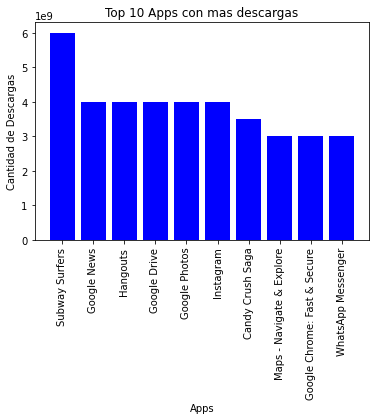

In [28]:
"""
App con mayor numero de descargas
"""
data['Installs'] = data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
i = data[data['Category'] == '1.9'].index
data.loc[i]
data = data.drop(i)

data['Installs'] = data['Installs'].astype(int)
res = data.groupby('App')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)


plt.bar("App", "Installs", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Cantidad de Descargas")
plt.title("Top 10 Apps con mas descargas")
plt.show()

In [29]:
"""
La aplicacion de mayor peso
"""
data.sort_values('Size',ascending=False)
# 1659 apps cuyo peso es "Varies with device"
data.loc[data['Size'] == 'Varies with device'].shape

unwanted = data.loc[data['Size'] == 'Varies with device']
unwanted.shape
data.drop(unwanted.index,inplace = True)

#se eliminan los caracteres para convertir el size a numerico
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('k',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('+',''))

data.sort_values('Size',ascending=False).head()
#Convertir el campo size a numerico
data['Size'] = pd.to_numeric(data['Size'],errors='coerce')
data.sort_values('Size', ascending=False).iloc[0]['App']

'Word Search Tab 1 FR'

Text(0, 0.5, 'Size')

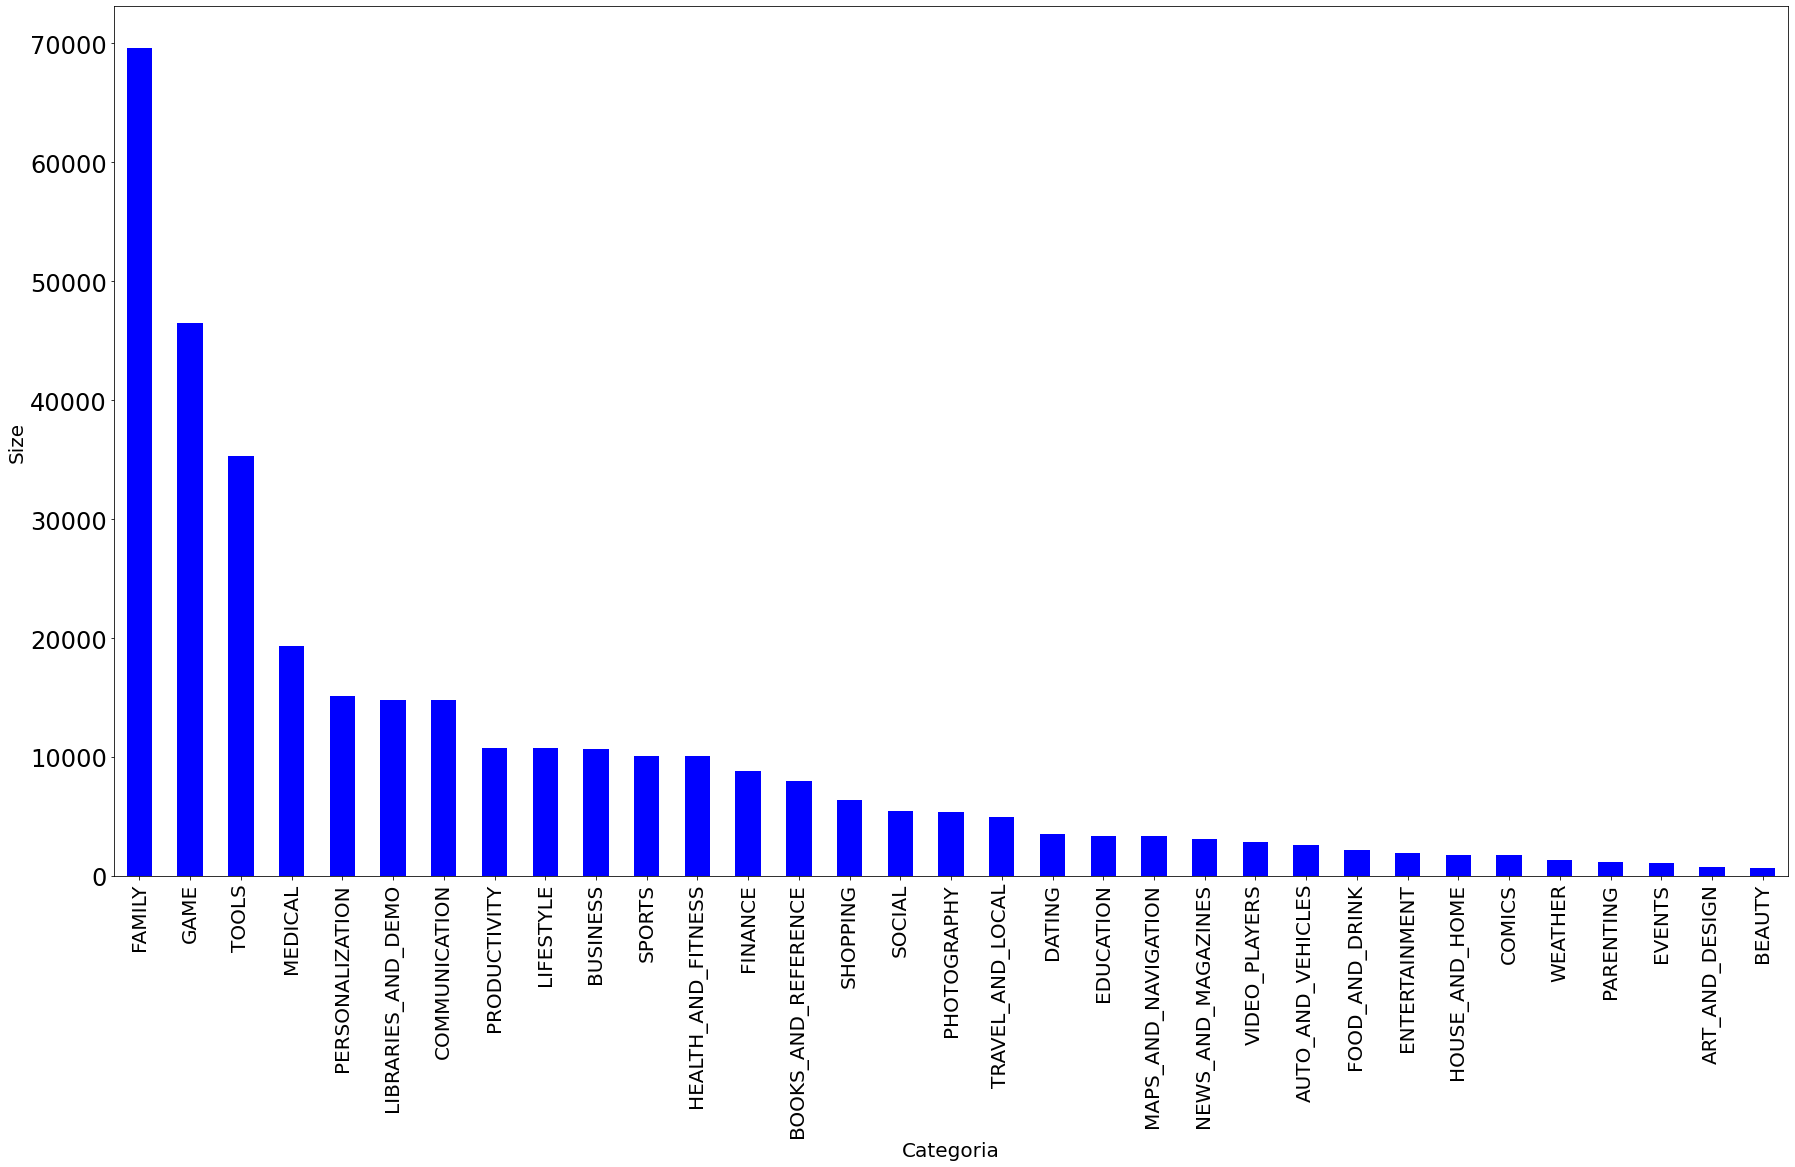

In [30]:
"""
Categoria mas popular
"""
data.loc[data['Size'] == 'Varies with device'].shape
unwanted = data.loc[data['Size'] == 'Varies with device']
unwanted.shape
data.drop(unwanted.index,inplace = True)

#Remove them inorder to convert the size column to numerics
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('k',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('+',''))

#Converting Size column to numerics
data['Size'] = pd.to_numeric(data['Size'],errors='coerce')
res = data.groupby('Category')['Size'].sum().reset_index()
finaldata = res.sort_values('Size', ascending=False).reset_index(drop=True)

ind = finaldata.set_index("Category", inplace = True)
bar = finaldata.plot(kind='bar',figsize=(30, 16), color = "blue", legend = None)
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 20)
plt.xlabel("Categoria", fontsize = 20)
plt.ylabel("Size", fontsize = 20)

In [34]:
"""
Data Visualizataion
"""

def plot_app_types(df):
    """
    Plot app type distributions across categories
    """
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)

    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)

def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):
    """
    Plot the mean of a target column (Numeric) groupped by the group column (categorical)
    """
    order = sorted(list(set(df[group_col])))
    stats = df.groupby(group_col).mean()[target_col]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
    ax.set(ylim=(3.8, 4.5))  
    ax.tick_params(labelrotation=90)
    return stats



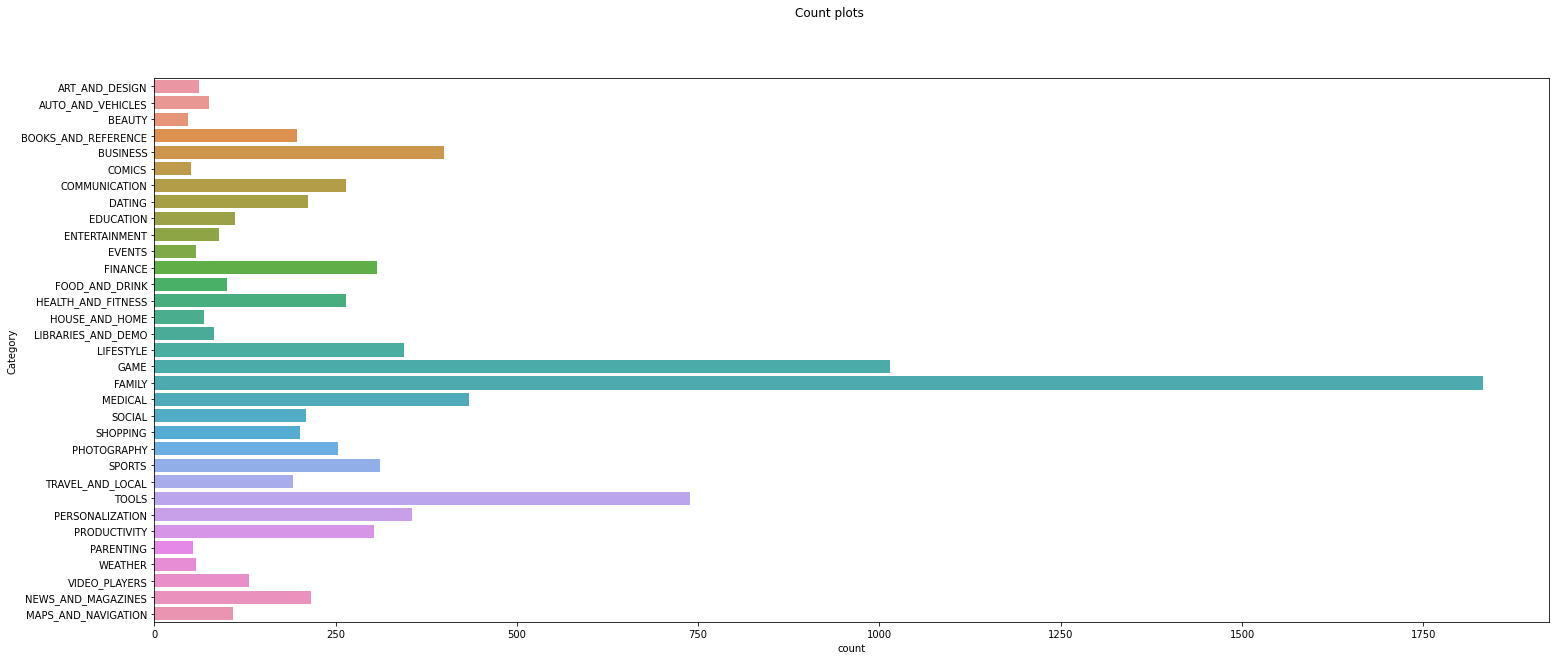

In [38]:
fig,(ax1)=plt.subplots(1,1,figsize=(25,10))
plt.suptitle('Count plots')
sns.countplot(y='Category',data=data,ax=ax1)
plt.show()